In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
import wandb

label_dir = "../data/Label"

dirs = os.listdir(label_dir)
# print(dirs)

label_files = glob.glob(label_dir+'/p*')
label_files.sort()
# print(label_files)

pitches = []
yaws = []
for lfile in label_files:
    with open(lfile) as f:
        lines = list(f)
        for line in lines[1:]:
            line = line.strip().split(" ")
            gaze2d = line[7]
            label = np.array(gaze2d.split(",")).astype("float")
#             label = torch.from_numpy(label).type(torch.FloatTensor)
            pitch = label[0]* 180 / np.pi
            yaw = label[1]* 180 / np.pi
            yaw, pitch  = -1*pitch, yaw
            pitches.append(pitch)
            yaws.append(yaw)
#             print(pitch, yaw)

pitches = np.array(pitches)
yaws = np.array(yaws)

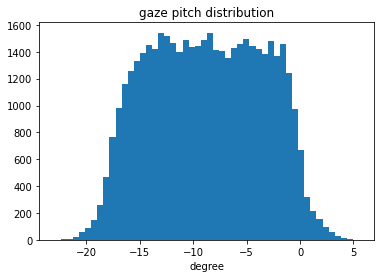

wandb: Currently logged in as: synthesis-ai (use `wandb login --relogin` to force relogin)


<Figure size 432x288 with 0 Axes>

In [2]:
ax = plt.hist(pitches,bins=50)
plt.title("gaze pitch distribution")
plt.xlabel("degree")
plt.show()

with wandb.init(project='real data gaze pitch distributions') as run:
    run.log({"data":wandb.Image(plt)})

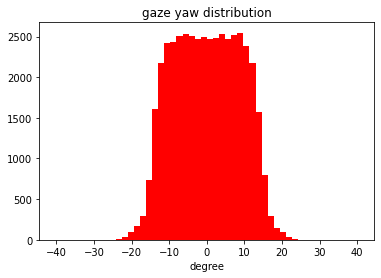

<Figure size 432x288 with 0 Axes>

In [3]:
plt.cla()
plt.hist(yaws,bins=50, color='r')
plt.title("gaze yaw distribution")
plt.xlabel("degree")
plt.show()
with wandb.init(project='real data gaze yaw distributions') as run:
    run.log({"data":wandb.Image(plt)})